<a href="https://colab.research.google.com/github/manu49/BayesianNeuralNets/blob/master/LeNetModelForCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch  
import matplotlib.pyplot as plt  
import numpy as np  
import torch.nn.functional as func  
import PIL.ImageOps  
from torch import nn  
from torchvision import datasets,transforms   
import requests  
from PIL import Image  

In [ ]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  

In [ ]:
transform1=transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])  


In [ ]:
training_dataset=datasets.CIFAR10(root='./data',train=True,download=True,transform=transform1)  
validation_dataset=datasets.CIFAR10(root='./data',train=False,download=True,transform=transform1)  

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
training_loader=torch.utils.data.DataLoader(dataset=training_dataset,batch_size=100,shuffle=True)  
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=100,shuffle=False)

In [ ]:
def im_convert(tensor):  
    image=tensor.cpu().clone().detach().numpy()  
    image=image.transpose(1,2,0)  
    print(image.shape)  
    image=image*(np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5)))  
    image=image.clip(0,1)  
    return image

In [ ]:
classes=('plane','car','bird','cat','dear','dog','frog','horse','ship','truck')  
dataiter=iter(training_loader)  
images,labels=dataiter.next()  
fig=plt.figure(figsize=(25,4))  

<Figure size 1800x288 with 0 Axes>

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


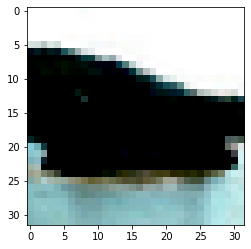

In [ ]:
for idx in np.arange(20):  
    ax=fig.add_subplot(2,10,idx+1)  
    plt.imshow(im_convert(images[idx]))  
    ax.set_title(classes[labels[idx].item()])  

In [ ]:
class LeNet(nn.Module):  
        def __init__(self):  
            super().__init__()  
            self.conv1=nn.Conv2d(3,20,5,1)  
            self.conv2=nn.Conv2d(20,50,5,1)  
            self.fully1=nn.Linear(5*5*50,500)  
            self.dropout1=nn.Dropout(0.5)   
            self.fully2=nn.Linear(500,10)  
        def forward(self,x):  
            x=func.relu(self.conv1(x))  
            x=func.max_pool2d(x,2,2)  
            x=func.relu(self.conv2(x))  
            x=func.max_pool2d(x,2,2)  
            x=x.view(-1,5*5*50) #Reshaping the output into desired shape  
            x=func.relu(self.fully1(x)) #Applying relu activation function to our first fully connected layer  
            x=self.dropout1(x)  
            x=self.fully2(x)    #We will not apply activation function here because we are dealing with multiclass dataset  
            return x

In [ ]:
model=LeNet().to(device)  
criteron=nn.CrossEntropyLoss()  
optimizer=torch.optim.Adam(model.parameters(),lr=0.00001)   
epochs=12  
loss_history=[]  
correct_history=[]  
val_loss_history=[]  
val_correct_history=[]

In [ ]:
for e in range(epochs):  
    loss=0.0  
    correct=0.0  
    val_loss=0.0  
    val_correct=0.0  
    for input,labels in training_loader:  
        input=input.to(device)  
        labels=labels.to(device)  
        outputs=model(input)  
        loss1=criteron(outputs,labels)  
        optimizer.zero_grad()  
        loss1.backward()  
        optimizer.step()  
        _,preds=torch.max(outputs,1)  
        loss+=loss1.item()  
        correct+=torch.sum(preds==labels.data)  
    else:  
        with torch.no_grad():  
            for val_input,val_labels in validation_loader:  
                val_input=val_input.to(device)  
                val_labels=val_labels.to(device)  
                val_outputs=model(val_input)  
                val_loss1=criteron(val_outputs,val_labels)   
                _,val_preds=torch.max(val_outputs,1)  
                val_loss+=val_loss1.item()  
                val_correct+=torch.sum(val_preds==val_labels.data)  
        epoch_loss=loss/len(training_loader)  
        epoch_acc=correct.float()/len(training_loader)  
        loss_history.append(epoch_loss)  
        correct_history.append(epoch_acc)  
        val_epoch_loss=val_loss/len(validation_loader)  
        val_epoch_acc=val_correct.float()/len(validation_loader)  
        val_loss_history.append(val_epoch_loss)  
        val_correct_history.append(val_epoch_acc)  
        print('training_loss:{:.4f},{:.4f}'.format(epoch_loss,epoch_acc.item()))  
        print('validation_loss:{:.4f},{:.4f}'.format(val_epoch_loss,val_epoch_acc.item()))

training_loss:2.2130,20.3120
validation_loss:2.0753,27.0100
training_loss:1.9910,29.0000
validation_loss:1.9223,31.7900
training_loss:1.8924,32.3460
validation_loss:1.8486,34.0500
training_loss:1.8292,34.4560
validation_loss:1.7952,35.7900
training_loss:1.7707,36.7220
validation_loss:1.7422,37.7600
training_loss:1.7237,38.2140
validation_loss:1.7018,38.7300
training_loss:1.6859,39.3340
validation_loss:1.6671,40.3800
training_loss:1.6529,40.8760
validation_loss:1.6402,41.4200
training_loss:1.6279,41.3400
validation_loss:1.6184,41.3900
training_loss:1.6053,42.2440
validation_loss:1.5988,42.9700
training_loss:1.5856,42.9480
validation_loss:1.5796,43.3000
training_loss:1.5723,43.3460
validation_loss:1.5607,43.5500


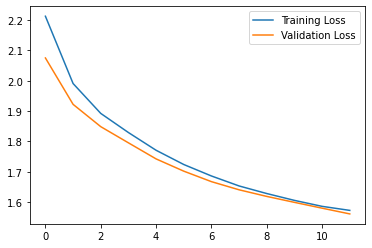

In [ ]:
plt.plot(loss_history,label='Training Loss')    
plt.plot(val_loss_history,label='Validation Loss')    
plt.legend()    
plt.show() 

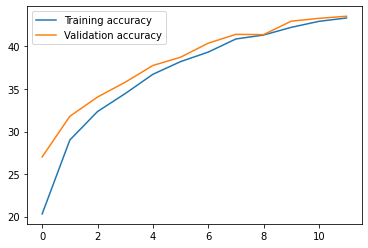

In [ ]:
plt.plot(correct_history,label='Training accuracy')    
plt.plot(val_correct_history,label='Validation accuracy')    
plt.legend()    
plt.show()

In [ ]:
url='https://3c1703fe8d.site.internapcdn.net/newman/gfx/news/hires/2018/2-dog.jpg'  
response=requests.get(url,stream=True)

(32, 32, 3)


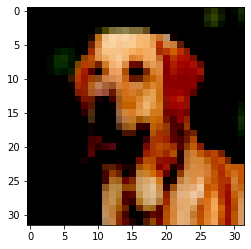

In [ ]:
img=Image.open(response.raw)  
img=transform1(img)   
plt.imshow(im_convert(img)) 

In [ ]:
img=Image.open(response.raw)  
img=transform1(img)     
image1=img.to(device).unsqueeze(0)  
output=model(image1)  
_,pred=torch.max(output,1)  
print(classes[pred.item()])  
dataiter=iter(validation_loader)    
images,labels=dataiter.next()    
images_=images.to(device)    
labels=labels.to(device)    
output=model(images_)    
_,preds=torch.max(output,1)    
fig=plt.figure(figsize=(25,4))

dog


<Figure size 1800x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


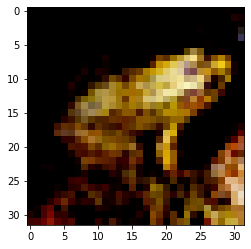

In [ ]:
for idx in np.arange(20):    
    ax=fig.add_subplot(2,10,idx+1,xticks=[],yticks=[])    
    plt.imshow(im_convert(images[idx]))    
    ax.set_title("{}({})".format(str(classes[preds[idx].item()]),str(classes[labels[idx].item()]),color=("green" if preds[idx]==labels[idx] else "red")))
plt.show()

In [ ]:
url='https://www.welcomewildlife.com/wp-content/uploads/2015/01/Frog-compare.jpg'  
response=requests.get(url,stream=True)

In [ ]:
img=Image.open(response.raw)  
img=transform1(img)     
image1=img.to(device).unsqueeze(0)  
output=model(image1)  
_,pred=torch.max(output,1)  
print(classes[pred.item()])  
dataiter=iter(validation_loader)    
images,labels=dataiter.next()    
images_=images.to(device)    
labels=labels.to(device)    
output=model(images_)    
_,preds=torch.max(output,1)    
fig=plt.figure(figsize=(25,4))

frog


<Figure size 1800x288 with 0 Axes>

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


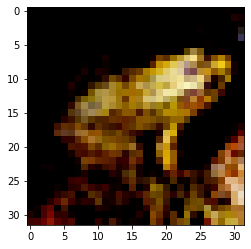

In [ ]:
for idx in np.arange(20):    
    ax=fig.add_subplot(2,10,idx+1,xticks=[],yticks=[])    
    plt.imshow(im_convert(images[idx]))    
    ax.set_title("{}({})".format(str(classes[preds[idx].item()]),str(classes[labels[idx].item()]),color=("green" if preds[idx]==labels[idx] else "red")))
plt.show()